# DEFAULT PAYMENT NEXT MONTH PREDICTION

In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


# IMPORT DATASET

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import KNNImputer
%matplotlib inline

from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.model_selection import KFold

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import Ridge
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
path="./credit_card_clients.xls"
data = pd.read_excel(path,skiprows=[0])
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


<p> All customers in the dataset has record of default payment next month
<p>From April - September, minimum amount of bill statement is negative
<p>From April - September, minimum amount of previous payment is 0
<P> Pay status from September to April range from -2 to 8
<p> There is no null in the dataset

## DATA PREPROCESSING

In [5]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [6]:
#Rename columns related to pay amount and bill amount
data.rename(columns={'PAY_0':'PAY_SEPTEMBER','PAY_2':'PAY_AUGUST','PAY_3':'PAY_JULY','PAY_4':'PAY_JUNE','PAY_5':'PAY_MAY','PAY_6':'PAY_APRIL',
                   'BILL_AMT1':'BILL_AMT_SEPTEMBER','BILL_AMT2':'BILL_AMT_AUGUST','BILL_AMT3':'BILL_AMT_JULY','BILL_AMT4':'BILL_AMT_JUNE','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APRIL'
                    ,'PAY_AMT1':'PAY_AMT_SEPTEMBER','PAY_AMT2':'PAY_AMT_AUGUST','PAY_AMT3':'PAY_AMT_JULY','PAY_AMT4':'PAY_AMT_JUNE','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APRIL'},inplace=True)

In [7]:
#Replace values '-1' with '0' in pay status columns ( because 0 means 0 months late)
data[ 'PAY_SEPTEMBER'].replace([-1,0],inplace = True)
data[ 'PAY_AUGUST'].replace([-1,0],inplace = True)
data[ 'PAY_JULY'].replace([-1,0],inplace = True)
data[ 'PAY_JUNE'].replace([-1,0],inplace = True)
data[ 'PAY_MAY'].replace([-1,0],inplace = True)
data[ 'PAY_APRIL'].replace([-1,0],inplace = True)

### Fill unknown data

In [9]:
#Treat null spot
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_SEPTEMBER                 0
PAY_AUGUST                    0
PAY_JULY                      0
PAY_JUNE                      0
PAY_MAY                       0
PAY_APRIL                     0
BILL_AMT_SEPTEMBER            0
BILL_AMT_AUGUST               0
BILL_AMT_JULY                 0
BILL_AMT_JUNE                 0
BILL_AMT_MAY                  0
BILL_AMT_APRIL                0
PAY_AMT_SEPTEMBER             0
PAY_AMT_AUGUST                0
PAY_AMT_JULY                  0
PAY_AMT_JUNE                  0
PAY_AMT_MAY                   0
PAY_AMT_APRIL                 0
default payment next month    0
dtype: int64

There is no null spots in this dataframe
<p> In education, we replace NaN values to unknown data which labelled as '6' and '5'
<p> In repayment status columns, we replace NaN values to values '-2' which are meaningless status
<p> 
<p> After elimination of  duplicated rows, we impute missing data NaN using k-nearest neighbor imputer

In [10]:
#Treat unknown data
#Replace values '6' and '5' with null in Education columns
data['EDUCATION'].replace(6, np.nan, inplace = True)
data['EDUCATION'].replace(5, np.nan, inplace = True)
data["EDUCATION"].isnull().sum()

331

In [11]:
#Replace value '-2' in pay status with null
data['PAY_SEPTEMBER'].replace(-2, np.nan, inplace = True)
data['PAY_AUGUST'].replace(-2, np.nan, inplace = True)
data['PAY_JULY'].replace(-2, np.nan, inplace = True)
data['PAY_JUNE'].replace(-2, np.nan, inplace = True)
data['PAY_MAY'].replace(-2, np.nan, inplace = True)
data['PAY_APRIL'].replace(-2, np.nan, inplace = True)
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_SEPTEMBER', 'PAY_AUGUST', 'PAY_JULY', 'PAY_JUNE', 'PAY_MAY',
       'PAY_APRIL', 'BILL_AMT_SEPTEMBER', 'BILL_AMT_AUGUST', 'BILL_AMT_JULY',
       'BILL_AMT_JUNE', 'BILL_AMT_MAY', 'BILL_AMT_APRIL', 'PAY_AMT_SEPTEMBER',
       'PAY_AMT_AUGUST', 'PAY_AMT_JULY', 'PAY_AMT_JUNE', 'PAY_AMT_MAY',
       'PAY_AMT_APRIL', 'default payment next month'],
      dtype='object')

In [12]:
#Eliminate duplicate rows
data.drop(columns='ID',inplace=True)
data.drop_duplicates()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPTEMBER,PAY_AUGUST,PAY_JULY,PAY_JUNE,PAY_MAY,...,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL,PAY_AMT_SEPTEMBER,PAY_AMT_AUGUST,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL,default payment next month
0,20000,2,2.0,1,24,2.0,2.0,-1.0,-1.0,NaN,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2.0,2,26,2.0,2.0,-1.0,-1.0,NaN,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2.0,2,34,2.0,2.0,-1.0,-1.0,NaN,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2.0,1,37,2.0,2.0,-1.0,-1.0,NaN,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2.0,1,57,2.0,2.0,-1.0,-1.0,NaN,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3.0,1,39,2.0,2.0,2.0,2.0,2.0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3.0,2,43,2.0,2.0,2.0,2.0,2.0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2.0,2,37,4.0,3.0,2.0,2.0,2.0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3.0,1,41,1.0,3.0,2.0,2.0,2.0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


drop duplicate data

<AxesSubplot:>

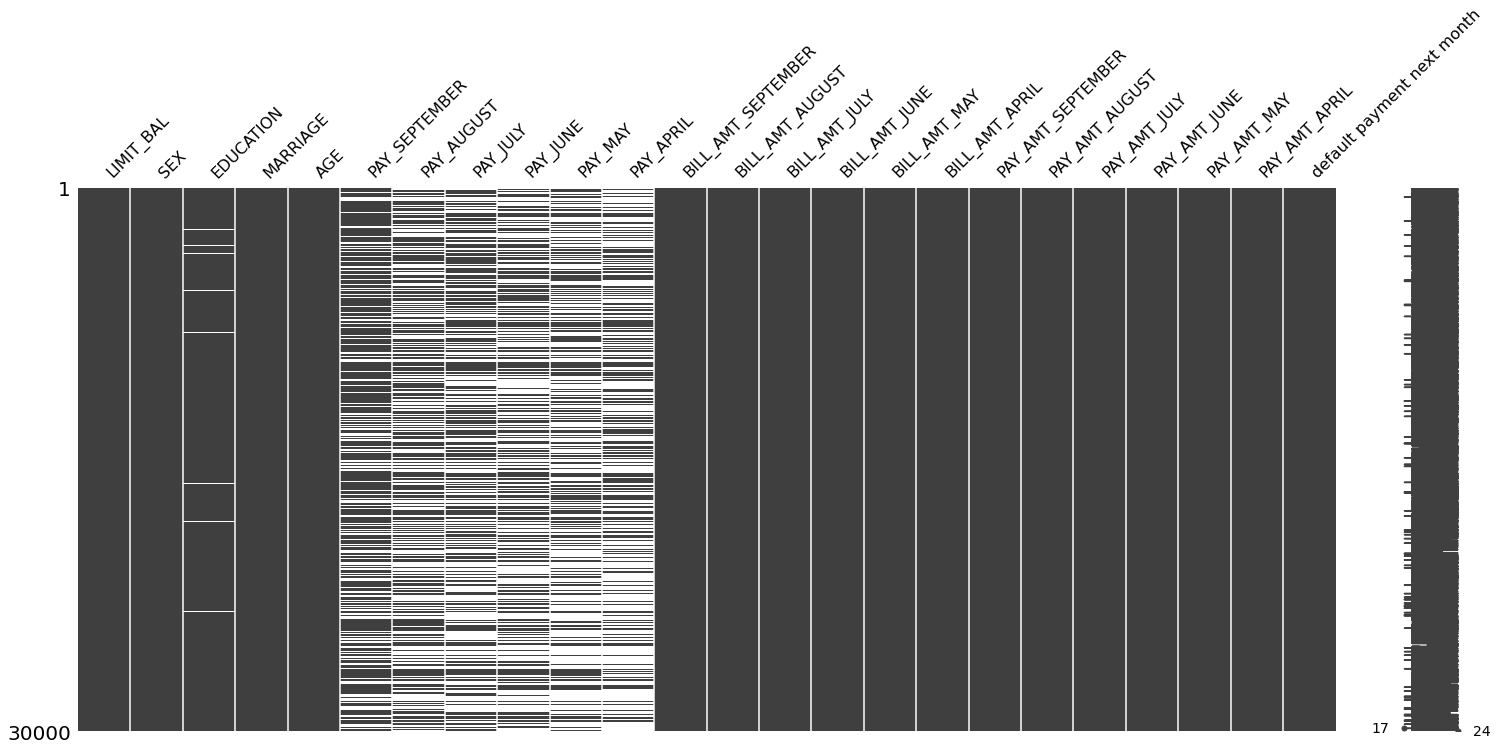

In [13]:
#Visualize the missing data
msno.matrix(data)

In [14]:
#Use KNNimputer to fill in missing data
X = data
imputer = KNNImputer(n_neighbors=5)
data_filled = pd.DataFrame(np.round(imputer.fit_transform(X)),columns = X.columns)
data_filled.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPTEMBER',
       'PAY_AUGUST', 'PAY_JULY', 'PAY_JUNE', 'PAY_MAY', 'PAY_APRIL',
       'BILL_AMT_SEPTEMBER', 'BILL_AMT_AUGUST', 'BILL_AMT_JULY',
       'BILL_AMT_JUNE', 'BILL_AMT_MAY', 'BILL_AMT_APRIL', 'PAY_AMT_SEPTEMBER',
       'PAY_AMT_AUGUST', 'PAY_AMT_JULY', 'PAY_AMT_JUNE', 'PAY_AMT_MAY',
       'PAY_AMT_APRIL', 'default payment next month'],
      dtype='object')

<AxesSubplot:>

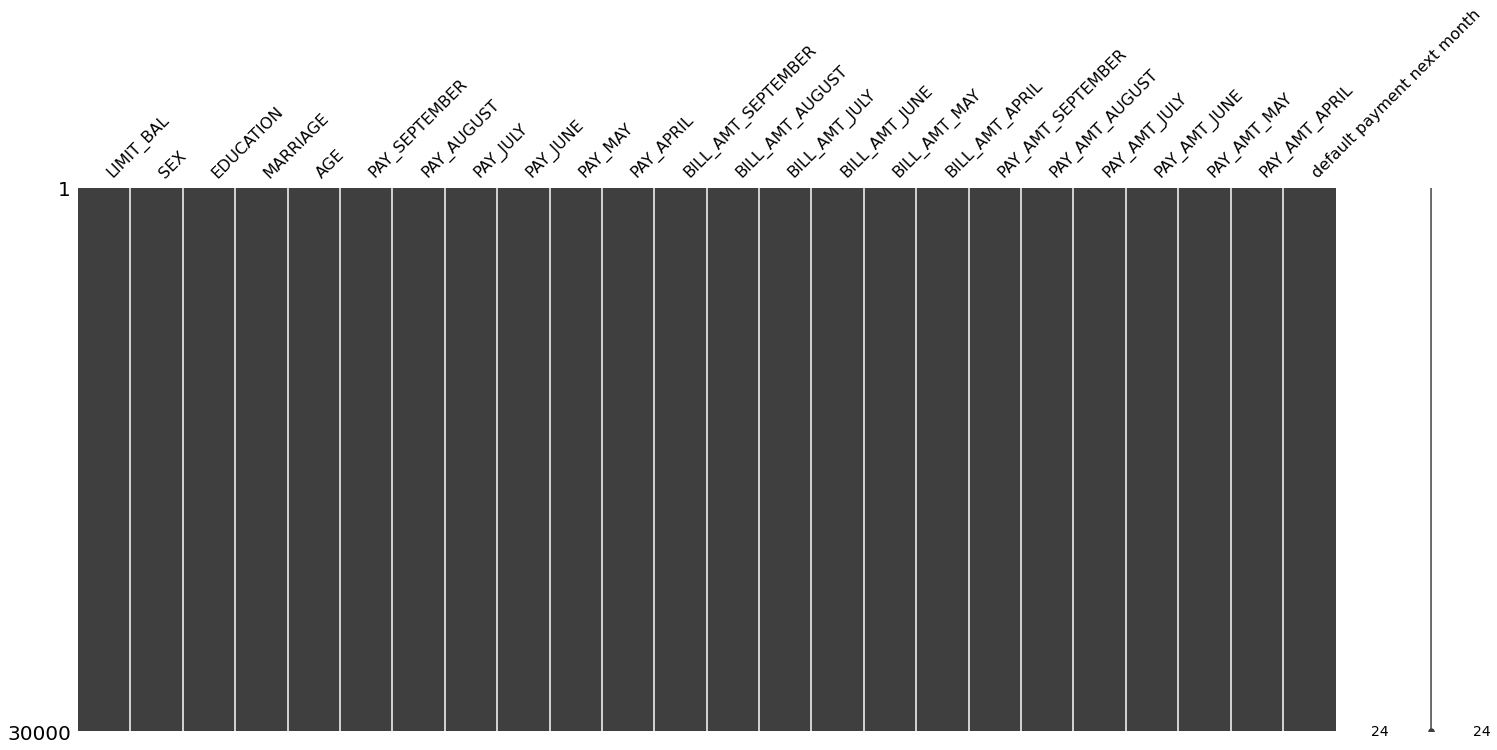

In [15]:
msno.matrix(data_filled)

In [16]:
#Calculating person correlation between independent variables and target variable:
data_filled.corr(method = 'pearson')['default payment next month'].sort_values()

LIMIT_BAL                    -0.153520
PAY_AMT_SEPTEMBER            -0.072929
PAY_AMT_AUGUST               -0.058579
PAY_AMT_JUNE                 -0.056827
PAY_AMT_JULY                 -0.056250
PAY_AMT_MAY                  -0.055124
PAY_AMT_APRIL                -0.053183
SEX                          -0.039961
MARRIAGE                     -0.024339
BILL_AMT_SEPTEMBER           -0.019644
BILL_AMT_AUGUST              -0.014193
BILL_AMT_JULY                -0.014076
BILL_AMT_JUNE                -0.010156
BILL_AMT_MAY                 -0.006760
BILL_AMT_APRIL               -0.005372
AGE                           0.013890
PAY_JULY                      0.021909
PAY_JUNE                      0.021946
PAY_AUGUST                    0.023366
PAY_MAY                       0.025790
PAY_APRIL                     0.037060
EDUCATION                     0.048471
PAY_SEPTEMBER                 0.090001
default payment next month    1.000000
Name: default payment next month, dtype: float64

## EDA

In [17]:
data_filled.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPTEMBER',
       'PAY_AUGUST', 'PAY_JULY', 'PAY_JUNE', 'PAY_MAY', 'PAY_APRIL',
       'BILL_AMT_SEPTEMBER', 'BILL_AMT_AUGUST', 'BILL_AMT_JULY',
       'BILL_AMT_JUNE', 'BILL_AMT_MAY', 'BILL_AMT_APRIL', 'PAY_AMT_SEPTEMBER',
       'PAY_AMT_AUGUST', 'PAY_AMT_JULY', 'PAY_AMT_JUNE', 'PAY_AMT_MAY',
       'PAY_AMT_APRIL', 'default payment next month'],
      dtype='object')

C:\Users\9999\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='default payment next month', ylabel='count'>

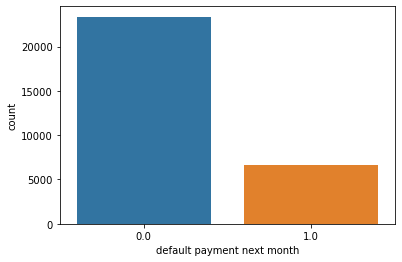

In [18]:
sns.countplot('default payment next month', data=data_filled)

In [19]:
a=data_filled.loc[data_filled['default payment next month']==0].count()
b=data_filled.loc[data_filled['default payment next month']==1].count()
c= a/b
c

LIMIT_BAL                     3.520796
SEX                           3.520796
EDUCATION                     3.520796
MARRIAGE                      3.520796
AGE                           3.520796
PAY_SEPTEMBER                 3.520796
PAY_AUGUST                    3.520796
PAY_JULY                      3.520796
PAY_JUNE                      3.520796
PAY_MAY                       3.520796
PAY_APRIL                     3.520796
BILL_AMT_SEPTEMBER            3.520796
BILL_AMT_AUGUST               3.520796
BILL_AMT_JULY                 3.520796
BILL_AMT_JUNE                 3.520796
BILL_AMT_MAY                  3.520796
BILL_AMT_APRIL                3.520796
PAY_AMT_SEPTEMBER             3.520796
PAY_AMT_AUGUST                3.520796
PAY_AMT_JULY                  3.520796
PAY_AMT_JUNE                  3.520796
PAY_AMT_MAY                   3.520796
PAY_AMT_APRIL                 3.520796
default payment next month    3.520796
dtype: float64

Ratio between number of good customer and default customer is 3.5

### Visualization for continuous variables

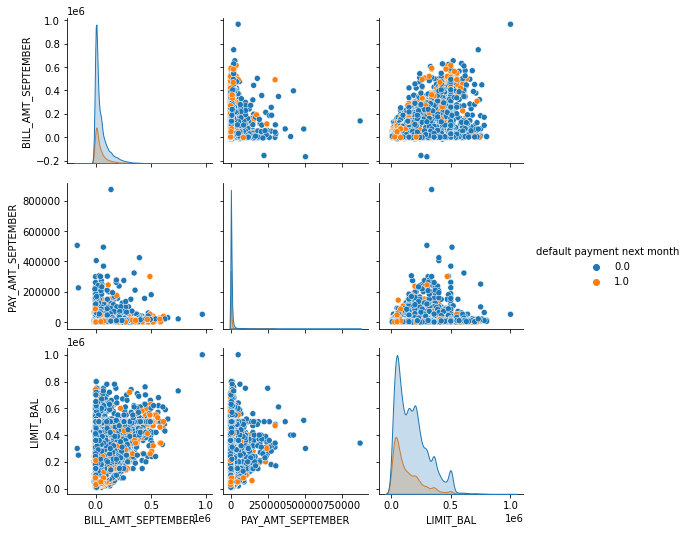

In [20]:
# Pairplots for continuous variables in one month
sns.pairplot(data=data_filled[['BILL_AMT_SEPTEMBER','PAY_AMT_SEPTEMBER','LIMIT_BAL','default payment next month']]
             , hue='default payment next month')

In bill amount, pay amount and limit balance, both default group and good group are concentrated around 0

#### Visualize relationship between bill amount in month and default payment next month

<AxesSubplot:xlabel='BILL_AMT_SEPTEMBER', ylabel='Density'>

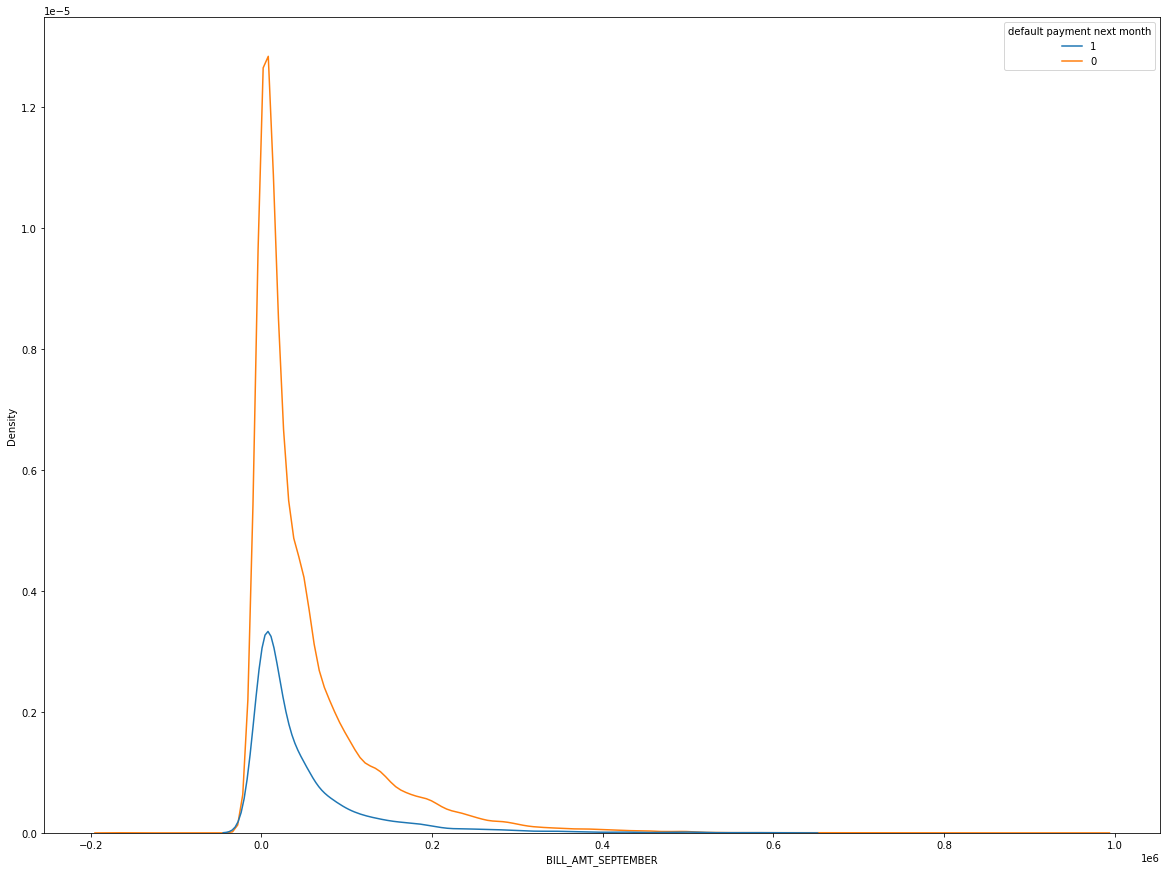

In [21]:
#Density of bill amount in September
#Blue line symbolizes the default payment, orange one does the good.
plt.figure(figsize=(20, 15))
sns.kdeplot('BILL_AMT_SEPTEMBER', hue='default payment next month'
            , hue_order=[1, 0], data=data_filled)

<AxesSubplot:xlabel='BILL_AMT_SEPTEMBER', ylabel='Density'>

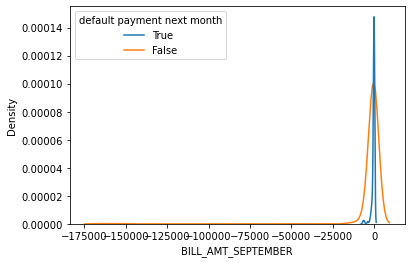

In [22]:
#Density of bill amount below <0 in month
sns.kdeplot(data[data_filled['BILL_AMT_SEPTEMBER']<0]['BILL_AMT_SEPTEMBER']
            , hue=data_filled['default payment next month'], hue_order=[True, False])

<AxesSubplot:xlabel='BILL_AMT_AUGUST', ylabel='Density'>

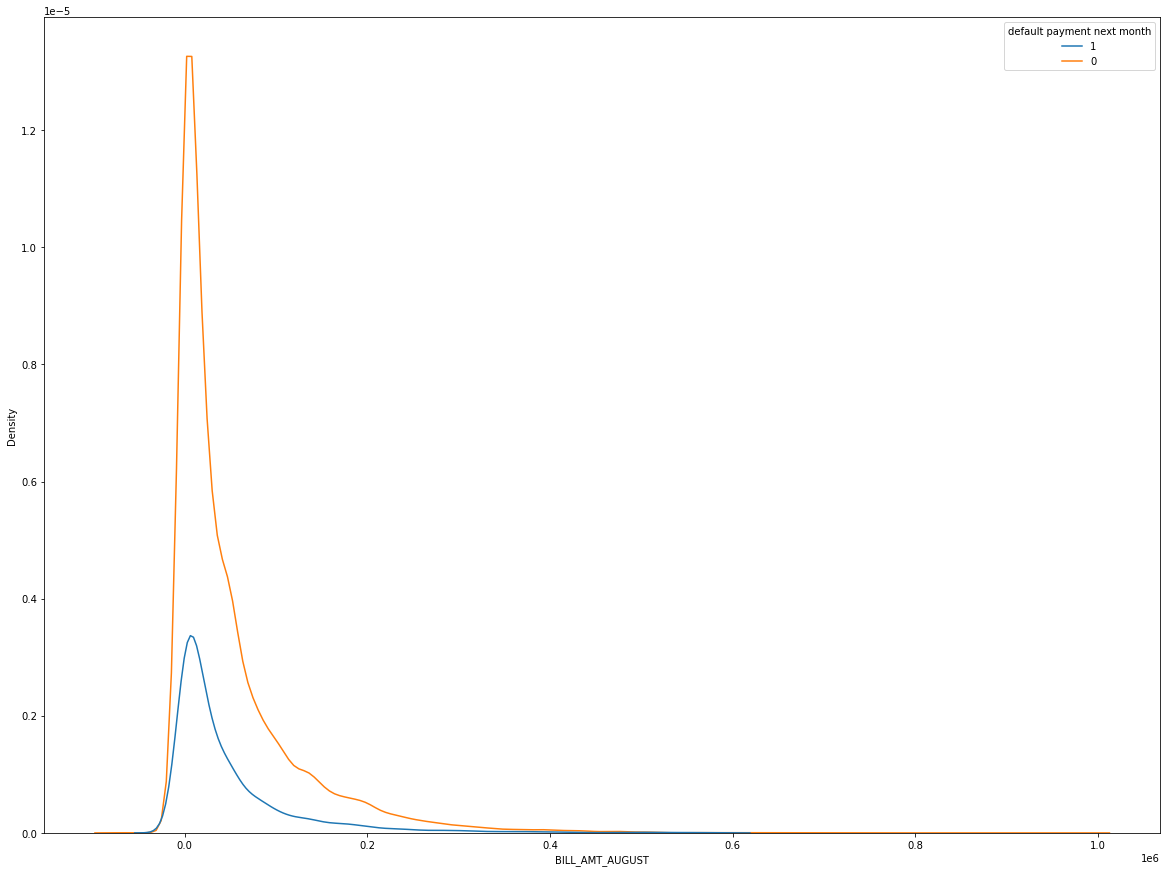

In [23]:
plt.figure(figsize=(20, 15))
sns.kdeplot('BILL_AMT_AUGUST', hue='default payment next month'
            , hue_order=[1, 0], data=data)

<AxesSubplot:xlabel='BILL_AMT_APRIL', ylabel='Density'>

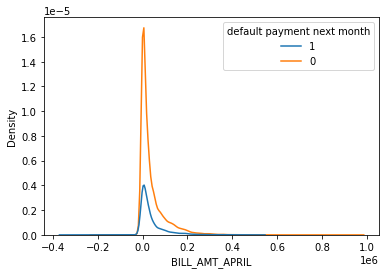

In [24]:
sns.kdeplot('BILL_AMT_APRIL', hue='default payment next month'
            , hue_order=[1, 0], data=data)

<AxesSubplot:xlabel='BILL_AMT_JULY', ylabel='Density'>

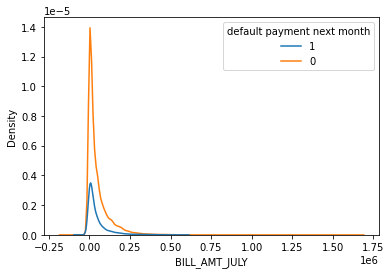

In [25]:
sns.kdeplot('BILL_AMT_JULY', hue='default payment next month'
            , hue_order=[1, 0], data=data)

<AxesSubplot:xlabel='BILL_AMT_JUNE', ylabel='Density'>

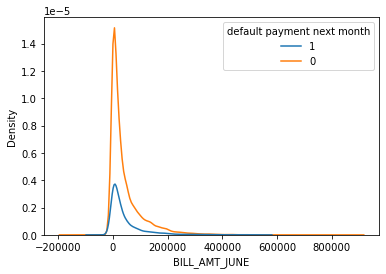

In [26]:
sns.kdeplot('BILL_AMT_JUNE', hue='default payment next month'
            , hue_order=[1, 0], data=data)

<AxesSubplot:xlabel='BILL_AMT_MAY', ylabel='Density'>

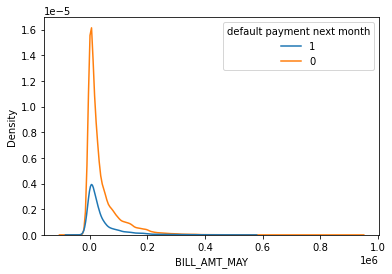

In [27]:
sns.kdeplot('BILL_AMT_MAY', hue='default payment next month'
            , hue_order=[1, 0], data=data)

<AxesSubplot:xlabel='BILL_AMT_APRIL', ylabel='Density'>

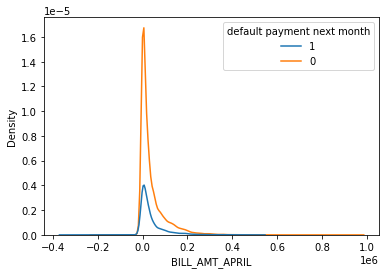

In [28]:
sns.kdeplot('BILL_AMT_APRIL', hue='default payment next month'
            , hue_order=[1, 0], data=data)

<AxesSubplot:xlabel='BILL_AMT_AUGUST', ylabel='Density'>

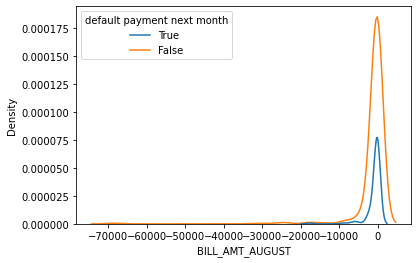

In [29]:
sns.kdeplot(data[data_filled['BILL_AMT_AUGUST']<0]['BILL_AMT_AUGUST']
            , hue=data_filled['default payment next month'], hue_order=[True, False])

<AxesSubplot:xlabel='BILL_AMT_JULY', ylabel='Density'>

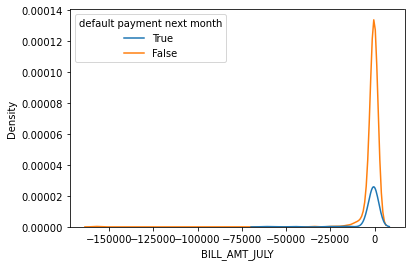

In [30]:
sns.kdeplot(data[data_filled['BILL_AMT_JULY']<0]['BILL_AMT_JULY']
            , hue=data_filled['default payment next month'], hue_order=[True, False])

<AxesSubplot:xlabel='BILL_AMT_MAY', ylabel='Density'>

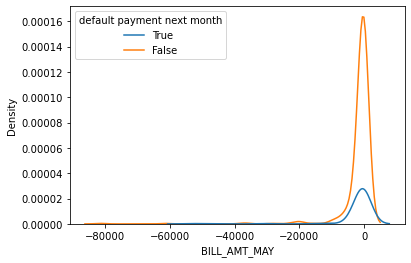

In [31]:
sns.kdeplot(data[(data_filled['BILL_AMT_MAY']<0)]['BILL_AMT_MAY']
            , hue=data_filled['default payment next month'], hue_order=[True, False])

From April to September,the default customer has a large proportion in total customer having low and negative bill amount, even though the good customer is 3.5 times higher than default customer

#### Visualize relationship between limit balance and default payment next month

<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Density'>

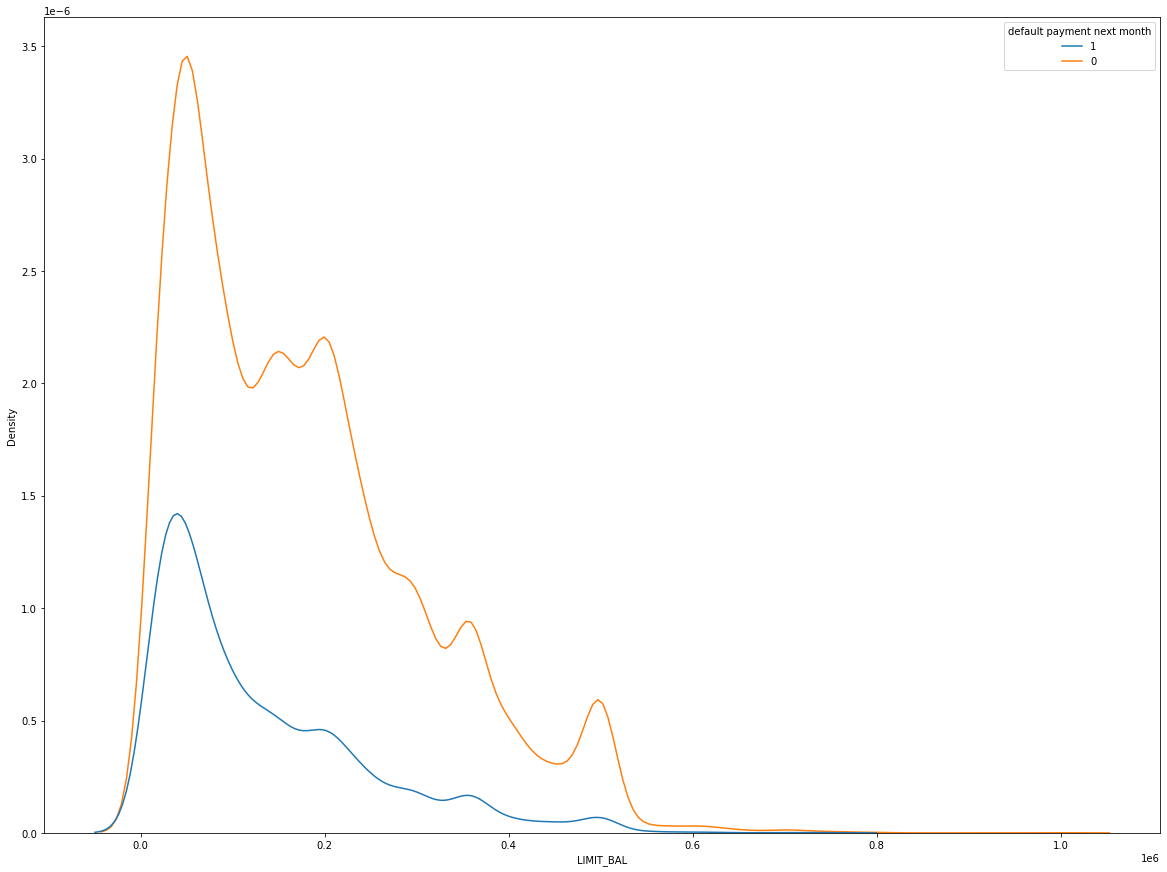

In [32]:
plt.figure(figsize=(20, 15))
sns.kdeplot('LIMIT_BAL', hue='default payment next month'
            , hue_order=[1, 0], data=data)

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

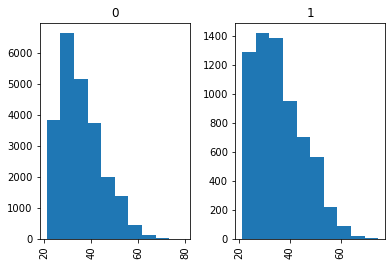

In [33]:
data['AGE'].hist(by=data['default payment next month'])

From the graph, it is implied that a proportion of default payment is large in the low balance limit
<p> The histogram of age also inteprets that default customer is younger than the good ones.

### Visualization for catergorical variables

C:\Users\9999\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\9999\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\9999\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


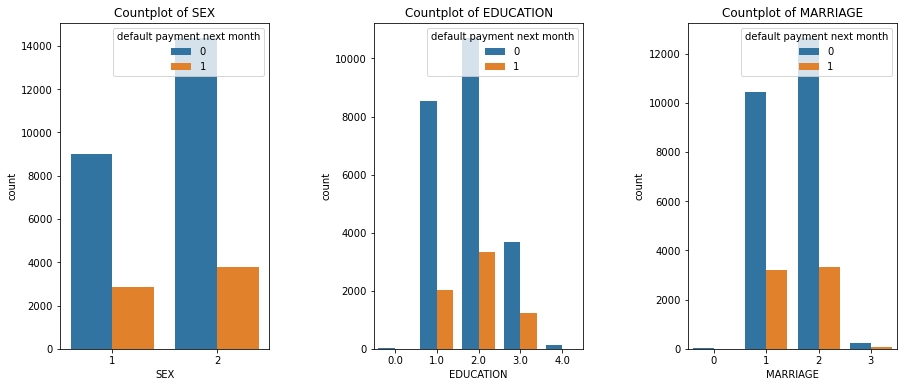

In [34]:
plt.figure(1, figsize=(15,6))
n=0
for x in ['SEX','EDUCATION','MARRIAGE']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.countplot(data[x], hue=data['default payment next month'])
    plt.title('Countplot of {}'.format(x))
plt.show()

From the graph, it is implied that the proportion of default payment in married people is higher than the single one. We suppose that people have more responsibility and burden with family than the single one.

And the proportion of default payment increases when gender change to male.

In lower education level, it witness an increase in proportion of default customers. It is supposed that lower educated person has less opturnity to highly paid and stable jobs, compared to higher one.

#### Visualize the relationship between pay status and status of default payment next month

C:\Users\9999\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\9999\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\9999\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


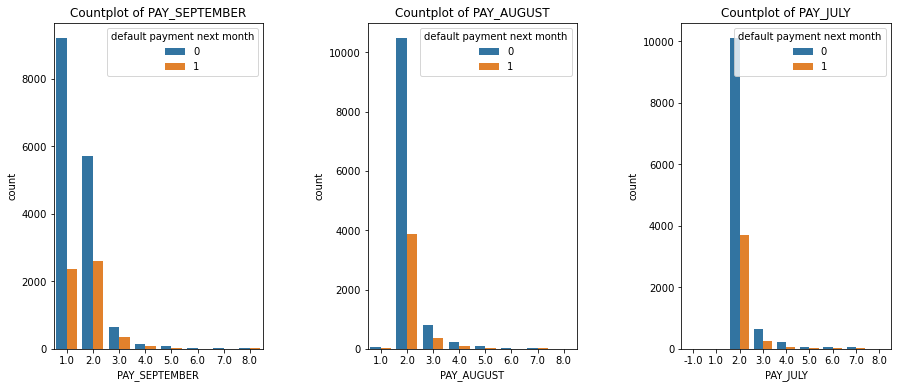

In [35]:
plt.figure(1, figsize=(15,6))
n=0
for x in ['PAY_SEPTEMBER','PAY_AUGUST','PAY_JULY']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.countplot(data[x], hue=data['default payment next month'])
    plt.title('Countplot of {}'.format(x))
plt.show()

C:\Users\9999\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\9999\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\9999\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


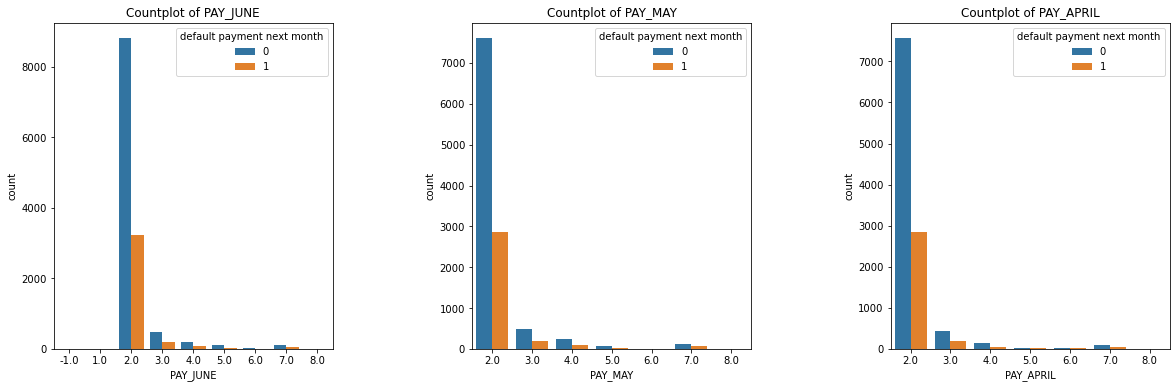

In [36]:
plt.figure(1, figsize=(20,6))
n=0
for x in ['PAY_JUNE','PAY_MAY','PAY_APRIL']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.countplot(data[x], hue=data['default payment next month'])
    plt.title('Countplot of {}'.format(x))
plt.show()

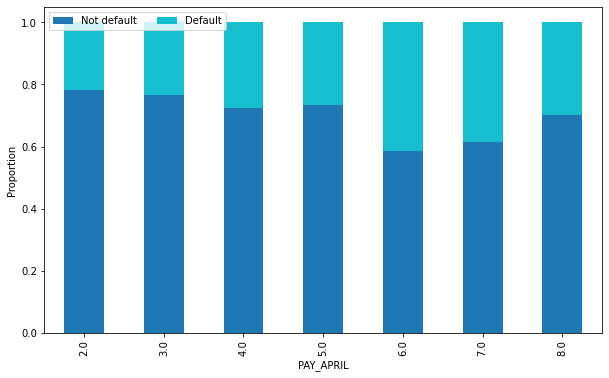

In [37]:
cross_tab = pd.crosstab(index=data_filled['PAY_APRIL'],
                        columns=data_filled['default payment next month'])
cross_tab['Not default'] = cross_tab[0.0]/(cross_tab[1.0]+cross_tab[0.0])
cross_tab['Default'] = cross_tab[1.0]/(cross_tab[1.0]+cross_tab[0.0])
cross_tab_prob = cross_tab[['Not default','Default']]
cross_tab_prob.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("PAY_APRIL")
plt.ylabel("Proportion")
plt.show()

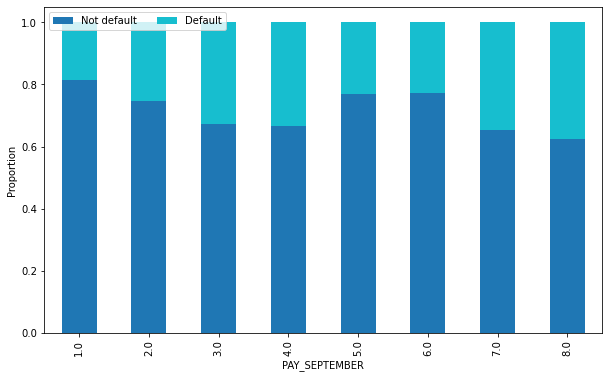

In [38]:
cross_tab = pd.crosstab(index=data_filled['PAY_SEPTEMBER'],
                        columns=data_filled['default payment next month'])
cross_tab['Not default'] = cross_tab[0.0]/(cross_tab[1.0]+cross_tab[0.0])
cross_tab['Default'] = cross_tab[1.0]/(cross_tab[1.0]+cross_tab[0.0])
cross_tab_prob = cross_tab[['Not default','Default']]
cross_tab_prob.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("PAY_SEPTEMBER")
plt.ylabel("Proportion")
plt.show()

 The more months late, the more default risk can customer be, bank should pay attention to customer with over - 4 - month late loan

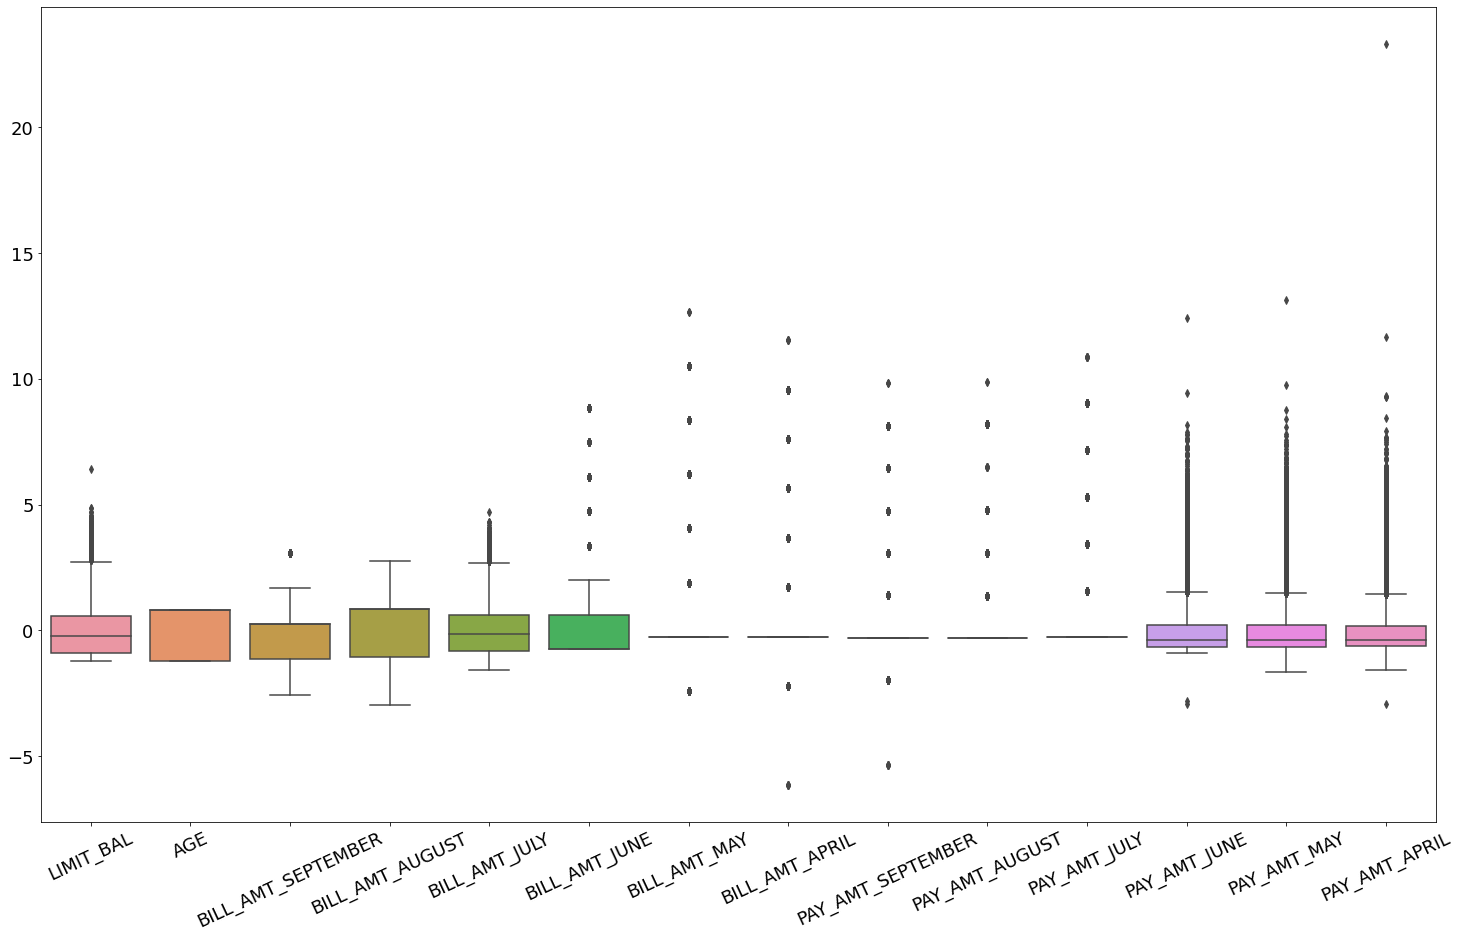

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_filled)

# BOXPLOT
cols = ['LIMIT_BAL','AGE','BILL_AMT_SEPTEMBER', 'BILL_AMT_AUGUST', 'BILL_AMT_JULY',
       'BILL_AMT_JUNE', 'BILL_AMT_MAY', 'BILL_AMT_APRIL', 'PAY_AMT_SEPTEMBER',
       'PAY_AMT_AUGUST', 'PAY_AMT_JULY', 'PAY_AMT_JUNE', 'PAY_AMT_MAY',
       'PAY_AMT_APRIL']
fig=plt.figure(1, figsize=(25,15))
ax=fig.add_subplot(111)
sns.boxplot(data=scaled_data[:,:-10])
plt.xticks(np.arange(0,14), labels=cols, rotation=25, fontsize=18)
plt.yticks(fontsize=18)
# plt.title('Boxplot', fontsize= 35)

plt.savefig('Fig - Boxplot Std Scaler')

From the boxplot figure, it is clear that there are a large number of outliners. However, due to the lack of domain knowledge and the very high number of identifiable outliers, no samples have been discarded as outliers.

# Encoding categorical variables

Because education, sex, marriage is catergorical variable, we get dummy for these ones.

In [40]:
for att in ['SEX', 'EDUCATION', 'MARRIAGE']:
  data_filled[att] = data_filled[att].astype('category')

# one-hot encoding
data_filled=pd.concat([pd.get_dummies(data_filled['SEX'], prefix='SEX',drop_first=True,dtype='int8'),
                pd.get_dummies(data_filled['EDUCATION'], prefix='EDUCATION',drop_first=True,dtype='int8'), 
                pd.get_dummies(data_filled['MARRIAGE'], prefix='MARRIAGE',drop_first=True,dtype='int8'),
                data],axis=1)
# drop original columns
data_filled.drop(['EDUCATION'],axis=1, inplace=True)
data_filled.drop(['SEX'],axis=1, inplace=True)
data_filled.drop(['MARRIAGE'],axis=1, inplace=True)


In [41]:
data_filled.columns

Index(['SEX_2.0', 'EDUCATION_1.0', 'EDUCATION_2.0', 'EDUCATION_3.0',
       'EDUCATION_4.0', 'MARRIAGE_1.0', 'MARRIAGE_2.0', 'MARRIAGE_3.0',
       'LIMIT_BAL', 'AGE', 'PAY_SEPTEMBER', 'PAY_AUGUST', 'PAY_JULY',
       'PAY_JUNE', 'PAY_MAY', 'PAY_APRIL', 'BILL_AMT_SEPTEMBER',
       'BILL_AMT_AUGUST', 'BILL_AMT_JULY', 'BILL_AMT_JUNE', 'BILL_AMT_MAY',
       'BILL_AMT_APRIL', 'PAY_AMT_SEPTEMBER', 'PAY_AMT_AUGUST', 'PAY_AMT_JULY',
       'PAY_AMT_JUNE', 'PAY_AMT_MAY', 'PAY_AMT_APRIL',
       'default payment next month'],
      dtype='object')

### Point biserial for correlation and p - value for numerical variable and categorical variable

In [42]:
y = data_filled['default payment next month']
df1 = data_filled[['AGE','LIMIT_BAL','BILL_AMT_SEPTEMBER', 'BILL_AMT_AUGUST', 'BILL_AMT_JULY',
       'BILL_AMT_JUNE', 'BILL_AMT_MAY', 'BILL_AMT_APRIL', 'PAY_AMT_SEPTEMBER',
       'PAY_AMT_AUGUST', 'PAY_AMT_JULY', 'PAY_AMT_JUNE', 'PAY_AMT_MAY',
       'PAY_AMT_APRIL']]

corre = []
pval = []

for column in df1:
    x=df1[column]
    corr, p = stats.pointbiserialr(list(x), list(y))
    corre.append(round(corr,3))
    pval.append(round(p,3))
results = np.array([corre, pval])
corr_table = pd.DataFrame(results
                          , index=['Correlation coefficient', 'P-value']
                          , columns=df1.columns)
corr_table

,AGE,LIMIT_BAL,BILL_AMT_SEPTEMBER,BILL_AMT_AUGUST,BILL_AMT_JULY,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL,PAY_AMT_SEPTEMBER,PAY_AMT_AUGUST,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL
Correlation coefficient,0.014,-0.154,-0.020,-0.014,-0.014,-0.010,-0.007,-0.005,-0.073,-0.059,-0.056,-0.057,-0.055,-0.053
P-value,0.016,0.000,0.001,0.014,0.015,0.079,0.242,0.352,0.000,0.000,0.000,0.000,0.000,0.000


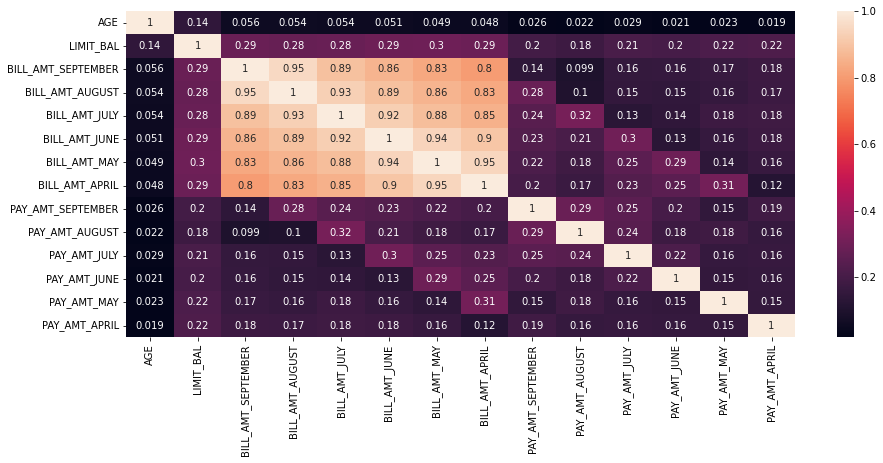

In [43]:
plt.figure(1, figsize=(15,6))
corr = df1.corr()
sns.heatmap(corr, annot= True);

### Cramers_V for correlation between two categorical variables

In [44]:
def cramers_V(var1,var2) :
    # Cross table building
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None))
    # Keeping of the test statistic of the Chi2 test
    stat = chi2_contingency(crosstab)[0]
    # Number of observations
    obs = np.sum(crosstab)
    # Take the minimum value between the columns and the rows of the cross table
    mini = min(crosstab.shape)-1
    return (stat/(obs*mini))

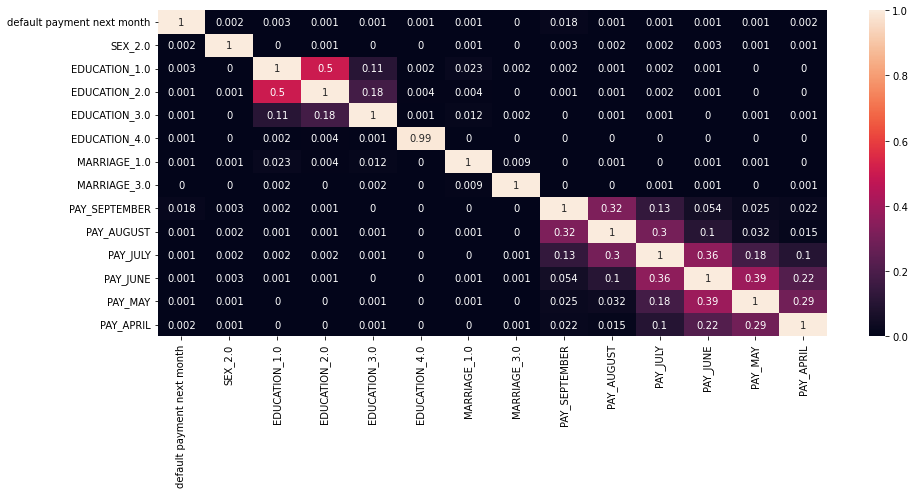

In [45]:
data_cat = data_filled[['default payment next month','SEX_2.0', 'EDUCATION_1.0', 'EDUCATION_2.0', 'EDUCATION_3.0',
       'EDUCATION_4.0', 'MARRIAGE_1.0', 'MARRIAGE_3.0','PAY_SEPTEMBER',
       'PAY_AUGUST', 'PAY_JULY', 'PAY_JUNE', 'PAY_MAY', 'PAY_APRIL']]

rows = []

for var1 in data_cat:
    col = []
    for var2 in data_cat:
        # Cramer's V test
        cramers = cramers_V(data_cat[var1], data_cat[var2])
        # Keeping of the rounded value of the Cramer's V  
        col.append(round(cramers,3))
    rows.append(col)
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns=data_cat.columns, index=data_cat.columns)
plt.figure(1, figsize=(15,6))
sns.heatmap(df, annot= True);

From the correlation among numerical variable table:
<p>There are 6 variables has high correlation (>0.8) with BILL_AMT_SEPTEMBER: PAY_AMT_AUGUST, PAY_AMT_JUNE,PAY_AMT_JULY,PAY_AMT_JUNE, PAY_AMT_MAY,PAY_AMT_APRIL
<p>We decide to omit these 6 variables to avoid multicolinearity for the model
<p>From the correlation among categorical variable table:
<p>There is high correlation between EDUCATION_1.0 and EDUCATION_2.0, therefore,we decide to drop EDUCATION_2.0 and keep only EDUCATION_1.0

In [46]:
#Drop 7 variables
data_filled.drop(['MARRIAGE_2.0', 'BILL_AMT_AUGUST', 'BILL_AMT_JULY',
       'BILL_AMT_JUNE', 'BILL_AMT_MAY', 'BILL_AMT_APRIL'],axis=1, inplace=True)


# Normalization

We normalize numerical variables using Standard scaler:<p>'LIMIT_BAL'<p>'BILL_AMT_SEPTEMBER'<p>'PAY_AMT_SEPTEMBER'<p>
'PAY_AMT_AUGUST'<p>'PAY_AMT_JULY'<p>'PAY_AMT_JUNE'<p>'PAY_AMT_MAY'<p>'PAY_AMT_APRIL'

In [47]:
data_filled.columns

Index(['SEX_2.0', 'EDUCATION_1.0', 'EDUCATION_2.0', 'EDUCATION_3.0',
       'EDUCATION_4.0', 'MARRIAGE_1.0', 'MARRIAGE_3.0', 'LIMIT_BAL', 'AGE',
       'PAY_SEPTEMBER', 'PAY_AUGUST', 'PAY_JULY', 'PAY_JUNE', 'PAY_MAY',
       'PAY_APRIL', 'BILL_AMT_SEPTEMBER', 'PAY_AMT_SEPTEMBER',
       'PAY_AMT_AUGUST', 'PAY_AMT_JULY', 'PAY_AMT_JUNE', 'PAY_AMT_MAY',
       'PAY_AMT_APRIL', 'default payment next month'],
      dtype='object')

In [48]:
X_1 = data_filled[['LIMIT_BAL','BILL_AMT_SEPTEMBER','PAY_AMT_SEPTEMBER',
       'PAY_AMT_AUGUST', 'PAY_AMT_JULY', 'PAY_AMT_JUNE', 'PAY_AMT_MAY',
       'PAY_AMT_APRIL']]
scaler = StandardScaler()

X_norm = scaler.fit_transform(X_1)
df_norm = pd.DataFrame(X_norm,columns=['LIMIT_BAL','BILL_AMT_SEPTEMBER','PAY_AMT_SEPTEMBER',
       'PAY_AMT_AUGUST', 'PAY_AMT_JULY', 'PAY_AMT_JUNE', 'PAY_AMT_MAY',
       'PAY_AMT_APRIL'])

# Model Development

In [49]:
#Creating X with 15 variables:
A = df_norm[['LIMIT_BAL','BILL_AMT_SEPTEMBER','PAY_AMT_SEPTEMBER',
       'PAY_AMT_AUGUST', 'PAY_AMT_JULY', 'PAY_AMT_JUNE', 'PAY_AMT_MAY',
       'PAY_AMT_APRIL']]
X_2= data_filled[['SEX_2.0', 'EDUCATION_1.0', 'EDUCATION_2.0', 'EDUCATION_3.0',
       'EDUCATION_4.0', 'MARRIAGE_1.0', 'MARRIAGE_3.0']]
X = pd.concat([A, X_2],axis=1)
#Creating Y:
Y = data_filled['default payment next month']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2
                                                    , stratify=Y, random_state=116)

In [51]:
y_train.value_counts(normalize=True)

0    0.778792
1    0.221208
Name: default payment next month, dtype: float64

In [52]:
y_test.value_counts(normalize=True)

0    0.778833
1    0.221167
Name: default payment next month, dtype: float64

## Logistic Regression 

In [53]:
#Create logistic regression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

In [54]:
print("Accuracy in train data: ", logmodel.score(X_train, y_train))
print("Accuracy in test data: ", logmodel.score(X_test, y_test))

Accuracy in train data:  0.7787916666666667
Accuracy in test data:  0.7788333333333334


In [55]:
result = cross_val_score(logmodel, X, Y, cv=4, scoring='roc_auc')
result.mean()

0.6436907153491578

In [56]:
#Using GridSearchCV to try with a number of C values 
grid_values = {'C': [0.001,0.01,0.1,1,10,100,1000]}
model = LogisticRegression(max_iter = 1000000)

# Creating grid
grid = GridSearchCV(estimator = model, param_grid = grid_values)
grid.fit(X, Y)

GridSearchCV(estimator=LogisticRegression(max_iter=1000000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [57]:
#Finding the best parameter C value
print("Accuracy: %.3f" % (grid.best_score_ * 100))
print("Best Model Parameters:", grid.best_estimator_)

Accuracy: 77.880
Best Model Parameters: LogisticRegression(C=0.001, max_iter=1000000)


In [58]:
#Applying logistic regression with best C value
logmodel_1 = LogisticRegression(max_iter =1000000,C=0.001)
logmodel_1.fit(X_train, y_train)
y_log1pred = logmodel_1.predict(X_test)

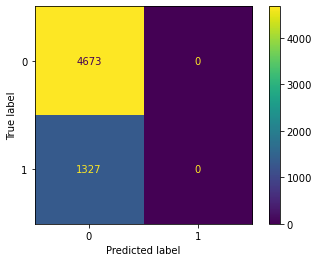

Confusion Matrix


In [59]:
#Plotting confusing matrix
plot_confusion_matrix(logmodel_1, X_test, y_test, values_format = 'd')
plt.show()
print('Confusion Matrix')

In [60]:
#Table of relevant index:
log1_trainr2 = round(logmodel_1.score(X_train, y_train), 3)
log1_mse = round(mean_squared_error(y_test, y_log1pred), 3)
log1_ac = round(accuracy_score(y_test, y_log1pred), 3)
log1_prec = round(precision_score(y_test, y_log1pred), 3)
log1_rec = round(recall_score(y_test, y_log1pred), 3)
log1_f1 = round(f1_score(y_test, y_log1pred), 3)

log_results = pd.DataFrame(
    index=['R-squared on the training set', 'Mean squared error', 'Accuracy score'
           , 'Precision score', 'Recall score', 'F1 score']
    , data={'Values': [log1_trainr2, log1_mse, log1_ac, log1_prec, log1_rec, log1_f1]}
)
log_results

C:\Users\9999\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Values
R-squared on the training set,0.779
Mean squared error,0.221
Accuracy score,0.779
Precision score,0.000
Recall score,0.000
F1 score,0.000


#### POLYNOMINAL FEATURES

In [61]:
#Creating new logistic regression and fit newly created polynomial features
pr = PolynomialFeatures(degree=n)
pr1 = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(X_train)
x_test_pr = pr.fit_transform(X_test)

#### LOGISTIC REGRESSION WITH POLYNOMINAL FEATURE

In [62]:
logi = LogisticRegression(C=0.001,max_iter=1000000)
logi.fit(x_train_pr, y_train)
y_logpred = logi.predict(x_test_pr)

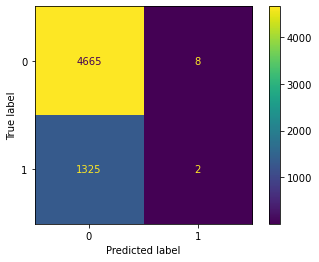

Confusion Matrix


In [63]:
plot_confusion_matrix(logi, x_test_pr, y_test, values_format = 'd')
plt.show()
print('Confusion Matrix')

In [64]:
log_trainr2 = round(logi.score(x_train_pr, y_train), 3)
log_mse = round(mean_squared_error(y_test, y_logpred), 3)
log_ac = round(accuracy_score(y_test, y_logpred), 3)
log_prec = round(precision_score(y_test, y_logpred), 3)
log_rec = round(recall_score(y_test, y_logpred), 3)
log_f1 = round(f1_score(y_test, y_logpred), 3)

logpo_results = pd.DataFrame(
    index=['R-squared on the training set', 'Mean squared error', 'Accuracy score'
           , 'Precision score', 'Recall score', 'F1 score']
    , data={'Values': [log_trainr2, log_mse, log_ac, log_prec, log_rec, log_f1]}
)
logpo_results

,Values
R-squared on the training set,0.780
Mean squared error,0.222
Accuracy score,0.778
Precision score,0.200
Recall score,0.002
F1 score,0.003


## KNN Classifier using Euclidean distance

Optimal k: 21


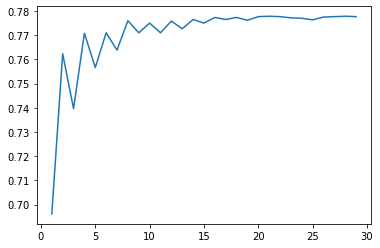

In [65]:
# Calculate accuracy scores corresponding to k
accuracy_scores = {}
for i in range(1,30):
    knne = KNeighborsClassifier(n_neighbors=i, metric = 'minkowski', p = 2, algorithm = 'brute')
    knne.fit(X_train,y_train)
    y_knnepred = knne.predict(X_test)
    accuracy_scores[i] = accuracy_score(y_test,y_knnepred)


# Plot accuracy scores
plt.plot(list(accuracy_scores.keys()),list(accuracy_scores.values()))
optimal_k = max(accuracy_scores.items(), key = lambda k : k[1])
print('Optimal k: {}'.format(optimal_k[0]))

In [66]:
#Creating KNN function using Euclidean distance and fit X_train, y_train
knne_1 = KNeighborsClassifier(n_neighbors = 21 , metric = 'minkowski', p = 2, algorithm = 'brute')
knne_1.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=21)

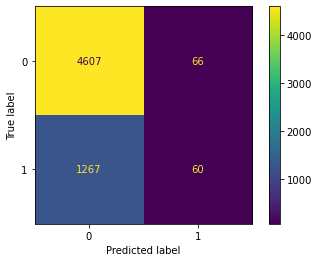

Confusion Matrix


In [67]:
#Plotting confusing matrix
plot_confusion_matrix(knne_1, X_test, y_test, values_format = 'd')
plt.show()
print('Confusion Matrix')

In [68]:
#Table of relevant index:
y_knnepred = knne_1.predict(X_test)
knne_trainr2 = round(knne_1.score(X_train, y_train), 3)
knne_mse = round(mean_squared_error(y_test, y_knnepred), 3)
knne_ac = round(accuracy_score(y_test, y_knnepred), 3)
knne_prec = round(precision_score(y_test, y_knnepred), 3)
knne_rec = round(recall_score(y_test, y_knnepred), 3)
knne_f1 = round(f1_score(y_test, y_knnepred), 3)

knne_results = pd.DataFrame(
    index=['R-squared on the training set', 'Mean squared error', 'Accuracy score'
           , 'Precision score', 'Recall score', 'F1 score']
    , data={'Values': [knne_trainr2, knne_mse, knne_ac, knne_prec, knne_rec, knne_f1]}
)
knne_results

,Values
R-squared on the training set,0.783
Mean squared error,0.222
Accuracy score,0.778
Precision score,0.476
Recall score,0.045
F1 score,0.083


## KNN Classifier using Manhattan distance

Optimal k: 20


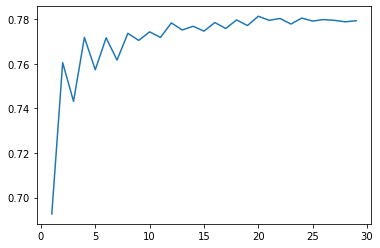

In [69]:
# Calculate accuracy scores corresponding to k
accuracy_scores = {}
for i in range(1,30):
    knn_m = KNeighborsClassifier(n_neighbors=i, metric = 'minkowski', p = 1, algorithm = 'brute')
    knn_m.fit(X_train,y_train)
    y_knnmpred = knn_m.predict(X_test)
    accuracy_scores[i] = accuracy_score(y_test,y_knnmpred)

# Plot accuracy scores
plt.plot(list(accuracy_scores.keys()),list(accuracy_scores.values()))
optimal_k = max(accuracy_scores.items(), key = lambda k : k[1])
print('Optimal k: {}'.format(optimal_k[0]))

In [70]:
#Creating KNN function using Manhattan distance and fit X_train, y_train
knnm_1 = KNeighborsClassifier(n_neighbors = 20  , metric = 'minkowski', p = 1, algorithm = 'brute')
knnm_1.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=20, p=1)

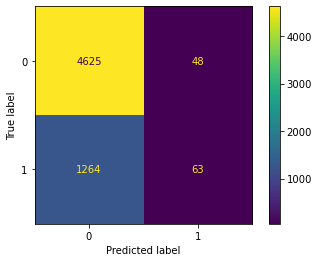

Confusion Matrix


In [71]:
#Plotting confusing matrix
plot_confusion_matrix(knnm_1, X_test, y_test, values_format = 'd')
plt.show()
print('Confusion Matrix')

In [72]:
#Table of relevant index:
y_knnmpred = knnm_1.predict(X_test)
knnm_trainr2 = round(knnm_1.score(X_train, y_train), 3)
knnm_mse = round(mean_squared_error(y_test, y_knnmpred), 3)
knnm_ac = round(accuracy_score(y_test, y_knnmpred), 3)
knnm_prec = round(precision_score(y_test, y_knnmpred), 3)
knnm_rec = round(recall_score(y_test, y_knnmpred), 3)
knnm_f1 = round(f1_score(y_test, y_knnmpred), 3)

knnm_results = pd.DataFrame(
    index=['R-squared on the training set', 'Mean squared error', 'Accuracy score'
           , 'Precision score', 'Recall score', 'F1 score']
    , data={'Values': [knnm_trainr2, knnm_mse, knnm_ac, knnm_prec, knnm_rec, knnm_f1]}
)
knnm_results

,Values
R-squared on the training set,0.785
Mean squared error,0.219
Accuracy score,0.781
Precision score,0.568
Recall score,0.047
F1 score,0.088


## SUPPORT VECTOR MACHINE

In [73]:
# Creating SVC model
svmmodel = SVC()
# Cross Validation
result = cross_val_score(svmmodel, X, Y, cv = 10)

# Result Support Vector Machine Classifier
print("SVM Classifier Accuracy: %.3f" % (result.mean() * 100))

SVM Classifier Accuracy: 77.877


In [74]:
svmmodel.fit(X_train,y_train)

y_svmpred = svmmodel.predict(X_test)

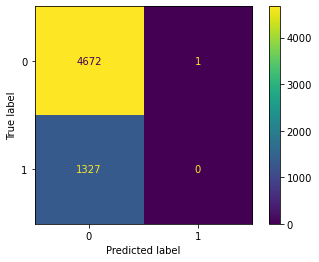

Confusion Matrix


In [75]:
#Plotting confusing matrix
plot_confusion_matrix(svmmodel, X_test, y_test, values_format = 'd')
plt.show()
print('Confusion Matrix')

In [76]:
#Table of relevant index:
svm_trainr2 = round(svmmodel.score(X_train, y_train), 3)
svm_mse = round(mean_squared_error(y_test, y_svmpred), 3)
svm_ac = round(accuracy_score(y_test, y_svmpred), 3)
svm_prec = round(precision_score(y_test, y_svmpred), 3)
svm_rec = round(recall_score(y_test, y_svmpred), 3)
svm_f1 = round(f1_score(y_test, y_svmpred), 3)

print('Results')
svm_results = pd.DataFrame(
    index=['R-squared on the training set', 'Mean squared error', 'Accuracy score'
           , 'Precision score', 'Recall score', 'F1 score']
    , data={'Values': [svm_trainr2, svm_mse, svm_ac, svm_prec, svm_rec, svm_f1]}
)
svm_results

Results


,Values
R-squared on the training set,0.780
Mean squared error,0.221
Accuracy score,0.779
Precision score,0.000
Recall score,0.000
F1 score,0.000


## DECISION TREE 

In [77]:
#Creating decision tree function
dec_tree = DecisionTreeClassifier()
#Finding the best parameters
criterion = ['gini', 'entropy']
splitter = ['best', 'random']
max_depth = list(2 * np.array(range(1,40)))
parameters = dict(criterion=criterion, splitter=splitter, max_depth=max_depth)

gs = GridSearchCV(dec_tree, parameters, scoring='recall')
gs.fit(X_train, y_train)

print('Best criterion:', gs.best_estimator_.get_params()['criterion'])
print('Best splitter:', gs.best_estimator_.get_params()['splitter'])
print('Best max_depth:', gs.best_estimator_.get_params()['max_depth'])

Best criterion: gini
Best splitter: best
Best max_depth: 52


In [78]:
#Creating decision tree model with best parameters:
dec_tree = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=46)

dec_tree.fit(X_train,y_train)

y_dcpred = dec_tree.predict(X_test)

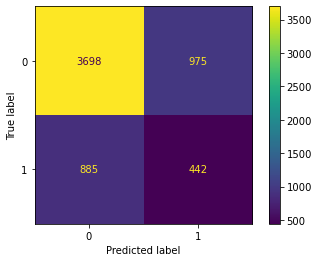

Confusion Matrix


In [79]:
#Plotting confusing matrix
plot_confusion_matrix(dec_tree, X_test, y_test, values_format = 'd')
plt.show()  
print('Confusion Matrix')

In [80]:
#Table of relevant index:
dec_trainr2 = round(dec_tree.score(X_train, y_train), 3)
dec_mse = round(mean_squared_error(y_test, y_dcpred), 3)
dec_ac = round(accuracy_score(y_test, y_dcpred), 3)
dec_prec = round(precision_score(y_test, y_dcpred), 3)
dec_rec = round(recall_score(y_test, y_dcpred), 3)
dec_f1 = round(f1_score(y_test, y_dcpred), 3)

print('Results')
dec_results = pd.DataFrame(
    index=['R-squared on the training set', 'Mean squared error', 'Accuracy score'
           , 'Precision score', 'Recall score', 'F1 score']
    , data={'Values': [dec_trainr2, dec_mse, dec_ac, dec_prec, dec_rec, dec_f1]}
)
dec_results

Results


,Values
R-squared on the training set,0.994
Mean squared error,0.310
Accuracy score,0.690
Precision score,0.312
Recall score,0.333
F1 score,0.322


# MODEL EVALUATION

In [83]:
con = pd.concat([log_results, logpo_results, dec_results, knnm_results, knne_results,svm_results]
               , keys=['Logistic Regression', 'Logistic Regression using 2nd order polynominal features','Decision Tree Classifier', 'k-NN Classifier - Manhattan distance'
                      , 'k-NN Classifier - Euclidean distance','Support Vector Machine']
               , names=['Models', 'Criteria'])

con1 = pd.pivot_table(con, values='Values', index=['Models'], columns=['Criteria'])
con1

Criteria,Accuracy score,F1 score,Mean squared error,Precision score,R-squared on the training set,Recall score
Models,,,,,,
Logistic Regression,0.779,0.000,0.221,0.000,0.779,0.000
Logistic Regression using 2nd order polynominal features,0.778,0.003,0.222,0.200,0.780,0.002
Decision Tree Classifier,0.690,0.322,0.310,0.312,0.994,0.333
k-NN Classifier - Manhattan distance,0.781,0.088,0.219,0.568,0.785,0.047
k-NN Classifier - Euclidean distance,0.778,0.083,0.222,0.476,0.783,0.045
Support Vector Machine,0.779,0.000,0.221,0.000,0.780,0.000


In conclusion, k-NN Classifier using Manhattan distance is the best model with highest accuracy score (78.1%),highest presion score (56.8%), high R squared (78.5%)

### Recommendation:

HEAVEN company should priortise credit card customer with following features:
+ Mature age: Because the default customers is likely younger and we suppose that mature customers are more responsible with loans
+ Higher limit balance and duly payment because they are better at using the fund to avoid reaching the limit and pay in time.
+ Higher-educated and single people as they have less responsiblity with family and higher chance of gainful and stable jobs.

In the credit scoring, HEAVEN should consider the factors the limit balance,the number of months late, amount of bill statement to reduce to default risk

# GROUP CONTRIBUTION
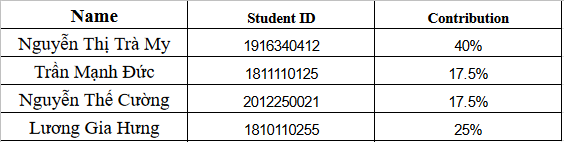